https://wikidocs.net/22647

In [1]:
# 원핫인코딩을 적용하면 단어의 유사도를 계산할 수 없음

In [ ]:
# 트랜스포머
# 트랜스포머는 RNN을 사용하지 않고 인코더-디코더 구조를 설계하였음에도 번역 성능에서도 RNN보다 우수한 성능을 보임
# 트랜스포머 => Attention is all you need 논문에서 나온 모델
# Bag of Words: 단어들의 순서는 전혀 고려하지 않고, 단어들의 출현 빈도(frequency)에만 집중하는 텍스트 데이터의 수치화 표현 방법

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print('bag of words vector :', vector.fit_transform(corpus).toarray()) 

# 각 단어의 인덱스가 어떻게 부여되었는지를 출력
print('vocabulary :',vector.vocabulary_)


bag of words vector : [[1 1 2 1 2 1]]
vocabulary : {'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


In [3]:
# 불용어를 제거한 BoW 만들기
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"]) # 직접 정의한 불용어
print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


In [12]:
vect.stop_words # 코랩에서는 english가 나오는 거 같음

['the', 'a', 'an', 'is', 'not']

In [9]:
vect.get_stop_words() # 코랩에서는 기본적인 불용어 사전이 출력됨. 현재는 로컬로 하므로 버전이 달라서 출력이 다름

frozenset({'a', 'an', 'is', 'not', 'the'})

In [ ]:
# 문서 단어 행렬(Document-Term Matrix, DTM)
# 다수의 문서에서 등장하는 각 "단어들의 빈도"를 행렬로 표현한 것
# 유사도를 구하기 위해서 DTM을 만들게 됨
# 문제점은 벡터의 크기가 너무 커짐
# 각 문서에는 중요한 단어와 불필요한 단어들이 혼재되어 있으므로 불용어의 빈도가 높더라도 자연어 처리에 있어 의미를 갖지 못하는 단어는 제거해야됨
# 이번엔 불용어와 중요한 단어에 대해서 가중치를 주는 방법에 대해서 확인

# TF-IDF: 흔치 않고, 해당 문서에서 많이 등장한 단어
# tf(=DTM) : 특정 문서 d에서 특정 단어 t의 등장 횟수
# df : 특정 단어 t가 등장한 문서수(한 문서에 몇번 등장했는지는 안봄)
# tf-idf에선 모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단하며 
# 특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단

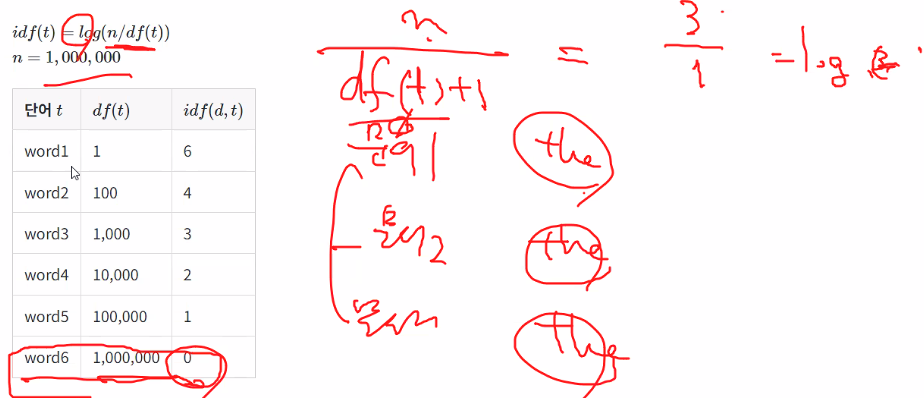

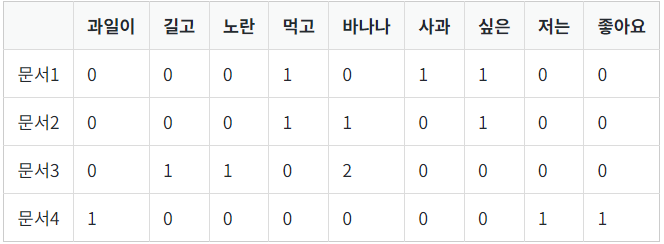
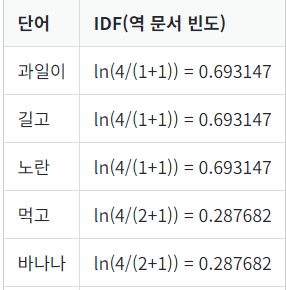

In [18]:
import numpy as np
np.log(4/3)

0.28768207245178085

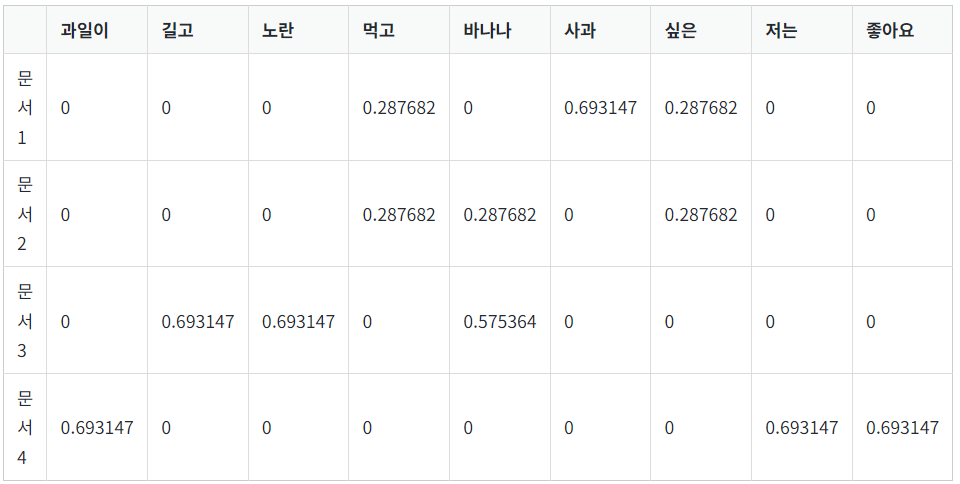

# 파이썬을 이용한 TF-IDF 구현

In [19]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해

docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [20]:
# 총 문서의 수
N = len(docs) 

def tf(t, d):
  return d.count(t)

def idf(t):
  df = 0
  for doc in docs:
    df += t in doc
  return log(N/(df+1))

def tfidf(t, d):
  return tf(t,d)* idf(t)

In [21]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)

In [22]:
tf_ # DTM이라고 보면 됨

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [23]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index=vocab, columns=["IDF"])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [24]:
result = []
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


# 사이킷런을 이용한 TF-IDF 구현

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print(vector.fit_transform(corpus).toarray())

# 각 단어와 맵핑된 인덱스 출력
print(vector.vocabulary_)

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [ ]:
# 자카드 유사도 = 합집합/교집합

In [27]:
# 워드 임베딩
# 각 단어를 인공 신경망 학습을 통해 벡터화하는 것임(현재는 벡터화가 아닌 수치화를 함)
# word2vec은 기초이면서도 완벽에 가까운 방법임
# http://w.elnn.kr/search/
# https://www.analyticsvidhya.com/blog/2021/07/word2vec-for-word-embeddings-a-beginners-guide/
# https://jalammar.github.io/illustrated-word2vec/
# CBOW
# word2vec은 은닉층이 한개뿐임. 근데 은닉층의 차원을 우리가 지정해야하므로 가장 중요한 요소임
# Q: TF-IDF도 단어를 벡터 나타내고 그 중에 더 중요한 단어를 표현한 건데, 임베딩의 일종인가요? A: 그렇다
# 워드투벡터는 내가 지정한 차원으로 값을 가지게 되므로 단어의 개수별로 인코딩하는 원핫인코딩과는 다름
# 결국 언어모델의 근간이 워드투벡터라고 보면 됨